In [57]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import pickle

import dataset

In [10]:
def get_client_sizes(partition_idx, dataset_name="compas-binary", platform="local"):
    partition_file = dataset.get_partition(platform, partition_idx, dataset=dataset_name)
    user_groups =  np.load(partition_file, allow_pickle=True).item()
    # print(user_groups)
    client_size_ls = [len(user_groups[i]) for i in range(len(user_groups))]

    return client_size_ls


def compute_weighted_mean(ls, client_size_ls):
    weighted_acc = []
    for i in range(len(ls)):
        weighted_acc.append(ls[i] * (client_size_ls[i]/sum(client_size_ls)))
    return sum(weighted_acc)

In [124]:


def collect_files(part_idx_ls, key_ls, ep_ls):
    path_ls = []
    
    stat_keys = ["test_eod_new", "test_acc_new", "test_eod_fedavg", "test_acc_fedavg",\
                "test_eod_fairfed_rep", "test_acc_fairfed_rep", "test_eod_fairfed", "test_acc_fairfed", \
                 "test_eod_new_ft", "test_acc_new_ft",]
    
    stat_dic = {}
#     {k: np.zeros(args.num_users) for k in stat_keys}
    
#     y_eod_new = []
#     y_acc_new = []
    
#     y_eod_fedavg = []
#     y_acc_fedavg = []
    
#     y_eod_fairfed = []
#     y_acc_fairfed = []    
    
#     y_eod_fairfed_rep = []
#     y_acc_fairfed_rep = []   
    
#     y_eod_new_ft = []
#     y_acc_new_ft = []    
    
#     y_eod = {}
#     y_acc = {}
    
    for i, p_id in enumerate(part_idx_ls):
        data_path = ("/Users/zhouyi/Desktop/Fair_FL_new/save/statistics/64/stats_compas-binary_plain2_frac1.0_client4_lr0.01_ftlr0.005_part{}_beta0.5_ep{}_1_10_ftep_12_bs32_ftbs256_fta_1.01.0/stats_multi_exp.pkl".\
                       format(p_id, ep_ls[i]))
        with open(data_path, 'rb') as inp:
            stats_all = pickle.load(inp)
            print("Round:", i, " Loaded stats saved in: ", data_path)
        
        
        client_size_ls = get_client_sizes(p_id, dataset_name="compas-binary")
        
        for key in stat_keys:
            if key not in stat_dic:
                stat_dic[key] = []
#             print(stat_dic[key])
            
#             if i not in stat_dic:
#                 stat_dic[i]={}
#             if key not in stat_dic[i]:
#                 stat_dic[i][key] = []
                
            stat_dic[key].append([compute_weighted_mean(ls, client_size_ls) for ls in stats_all[key]])
            
#              str(np.mean([compute_weighted_mean(ls, client_size_ls) for ls in stats_all[key]])) 
            
        
#         y_eod_new.append((compute_weighted_mean(np.mean(stats_all["test_eod_new"], axis=0), client_size_ls)))
#         y_acc_new.append((compute_weighted_mean(np.mean(stats_all["test_acc_new"], axis=0), client_size_ls)))
        
#         y_eod_fedavg.append((compute_weighted_mean(np.mean(stats_all["test_eod_fedavg"], axis=0), client_size_ls)))
#         y_acc_fedavg.append((compute_weighted_mean(np.mean(stats_all["test_acc_fedavg"], axis=0), client_size_ls)))

#         y_eod_fairfed.append((compute_weighted_mean(np.mean(stats_all["test_eod_fairfed"], axis=0), client_size_ls)))
#         y_acc_fairfed.append((compute_weighted_mean(np.mean(stats_all["test_acc_fairfed"], axis=0), client_size_ls)))

#         y_eod_fairfed_rep.append((compute_weighted_mean(np.mean(stats_all["test_eod_fairfed_rep"], axis=0), client_size_ls)))
#         y_acc_fairfed_rep.append((compute_weighted_mean(np.mean(stats_all["test_acc_fairfed_rep"], axis=0), client_size_ls)))

#         y_eod_new_ft.append((compute_weighted_mean(np.mean(stats_all["test_eod_fairfed"], axis=0), client_size_ls)))
#         y_acc_new_ft.append((compute_weighted_mean(np.mean(stats_all["test_acc_fairfed"], axis=0), client_size_ls)))



    return stat_dic

In [125]:
key_ls = ["test_eod_new"]
# part_idx_ls = [2,4,5]
# part_idx_ls = [2,4]
part_idx_ls = [9,2,5,6,7]
ep_ls = [50,42,42,42,42]
stat_dic = collect_files(part_idx_ls, key_ls, ep_ls)
stat_dic

Round: 0  Loaded stats saved in:  /Users/zhouyi/Desktop/Fair_FL_new/save/statistics/64/stats_compas-binary_plain2_frac1.0_client4_lr0.01_ftlr0.005_part9_beta0.5_ep50_1_10_ftep_12_bs32_ftbs256_fta_1.01.0/stats_multi_exp.pkl
Round: 1  Loaded stats saved in:  /Users/zhouyi/Desktop/Fair_FL_new/save/statistics/64/stats_compas-binary_plain2_frac1.0_client4_lr0.01_ftlr0.005_part2_beta0.5_ep42_1_10_ftep_12_bs32_ftbs256_fta_1.01.0/stats_multi_exp.pkl
Round: 2  Loaded stats saved in:  /Users/zhouyi/Desktop/Fair_FL_new/save/statistics/64/stats_compas-binary_plain2_frac1.0_client4_lr0.01_ftlr0.005_part5_beta0.5_ep42_1_10_ftep_12_bs32_ftbs256_fta_1.01.0/stats_multi_exp.pkl
Round: 3  Loaded stats saved in:  /Users/zhouyi/Desktop/Fair_FL_new/save/statistics/64/stats_compas-binary_plain2_frac1.0_client4_lr0.01_ftlr0.005_part6_beta0.5_ep42_1_10_ftep_12_bs32_ftbs256_fta_1.01.0/stats_multi_exp.pkl
Round: 4  Loaded stats saved in:  /Users/zhouyi/Desktop/Fair_FL_new/save/statistics/64/stats_compas-binary_p

{'test_eod_new': [[0.13489981069361018,
   0.09527229236280958,
   0.09906683161014634,
   0.13851899636384546,
   0.18371901457611514,
   0.11792939983210914],
  [0.10746772778077576,
   0.15222078386488125,
   0.08209429140178373,
   0.14741483589665455,
   0.07414215125462581,
   0.09891683512675703],
  [0.052955052880207694,
   0.06283920121945424,
   0.07145608426854672,
   0.12185656378406076,
   0.0373679277058552,
   0.058770252509980456],
  [0.09847229317620886,
   0.05453703140139149,
   0.10949675303656764,
   0.12041352076147249,
   0.1297137538534912,
   0.08272321043096827],
  [0.07357231203647056,
   0.07924543115201874,
   0.1455129763913076,
   0.08510301464577663,
   0.11404610102011975,
   0.04724167389601416]],
 'test_acc_new': [[0.5979812308820142,
   0.5837768910077399,
   0.5875990565716596,
   0.5904093088513767,
   0.5989287265610883,
   0.5734071420039685],
  [0.6049993413454139,
   0.6333591212420605,
   0.6125368734927547,
   0.5974170563009664,
   0.6096840

-----

[0.12823439 0.1103761  0.06754085 0.09922609 0.09078692]


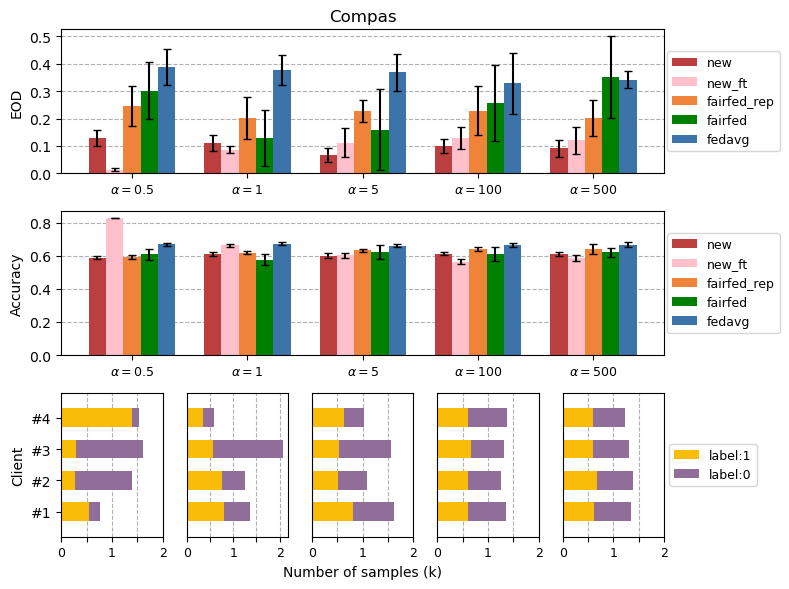

In [279]:
# fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8, 8))
X_label = [0.5, 1, 5.0, 100, 500]

X_label = [r'$\alpha=0.5$', r'$\alpha=1$', r'$\alpha=5$', r'$\alpha=100$', r'$\alpha=500$']

part_idx_ls = [9,2,5,6,7]
col = 5
fig_shape = (3, col)

fig = plt.figure(figsize=(8, 6)) 

cols = ["red","pink", "orange", "green", "blue"]
cols = ["#bb3f3f","pink", "#f0833a", "#008000", "#3c73a8"]

X = list(range(5))
X = np.arange(len(X_label))

y_eod_new=np.mean(stat_dic["test_eod_new"], axis=1)
y_eod_fedavg=np.mean(stat_dic["test_eod_fedavg"], axis=1)

print(y_eod_new)
width=0.6
n=4
ax1 = plt.subplot2grid(fig_shape, (0, 0), colspan=col)


ax1.bar(X-width/2, np.mean(stat_dic["test_eod_new"], axis=1), width/n, label='new',  color=cols[0], yerr=np.std(stat_dic["test_eod_new"], axis=1), capsize=3)
ax1.bar(X-width/4, np.mean(stat_dic["test_eod_new_ft"], axis=1), width/n, label='new_ft',  color=cols[1], yerr=np.std(stat_dic["test_eod_new_ft"], axis=1), capsize=3)
ax1.bar(X, np.mean(stat_dic["test_eod_fairfed_rep"], axis=1), width/n, label='fairfed_rep',  color=cols[2], yerr=np.std(stat_dic["test_eod_fairfed_rep"], axis=1), capsize=3)
ax1.bar(X+width/4, np.mean(stat_dic["test_eod_fairfed"], axis=1), width/n, label='fairfed',  color=cols[3], yerr=np.std(stat_dic["test_eod_fairfed"], axis=1), capsize=3)
ax1.bar(X+width/2, np.mean(stat_dic["test_eod_fedavg"], axis=1), width/n, label='fedavg',  color=cols[4], yerr=np.std(stat_dic["test_eod_fedavg"], axis=1), capsize=3)
# ax1.legend(loc='best', fontsize=9)

ax1.set_xticks(X, X_label, fontsize=9)
ax1.set_yticks(np.arange(0.0, 0.55, 0.1))
ax1.set_ylabel("EOD")
ax1.set_title("Compas", fontsize=12)


ax2 = plt.subplot2grid(fig_shape, (1, 0), colspan=col)

ax2.bar(X-width/2, np.mean(stat_dic["test_acc_new"], axis=1), width/n, label='new',  color=cols[0], yerr=np.std(stat_dic["test_acc_new"], axis=1), capsize=3)
ax2.bar(X-width/4, np.mean(stat_dic["test_acc_new_ft"], axis=1), width/n, label='new_ft',  color=cols[1], yerr=np.std(stat_dic["test_acc_new_ft"], axis=1), capsize=3)
ax2.bar(X, np.mean(stat_dic["test_acc_fairfed_rep"], axis=1), width/n, label='fairfed_rep',  color=cols[2], yerr=np.std(stat_dic["test_acc_fairfed_rep"], axis=1), capsize=3)
ax2.bar(X+width/4, np.mean(stat_dic["test_acc_fairfed"], axis=1), width/n, label='fairfed',  color=cols[3], yerr=np.std(stat_dic["test_acc_fairfed"], axis=1), capsize=3)
ax2.bar(X+width/2, np.mean(stat_dic["test_acc_fedavg"], axis=1), width/n, label='fedavg',  color=cols[4], yerr=np.std(stat_dic["test_acc_fedavg"], axis=1), capsize=3)

ax2.set_xticks(X, X_label, fontsize=9)
ax2.set_ylabel("Accuracy")
# ax2.set_xlabel(r'$\alpha$')


ax3 = plt.subplot2grid(fig_shape, (2, 0), colspan=1)


ax4 = plt.subplot2grid(fig_shape, (2, 1), colspan=1)


ax5 = plt.subplot2grid(fig_shape, (2, 2), colspan=1)


ax6 = plt.subplot2grid(fig_shape, (2, 3), colspan=1)


ax7 = plt.subplot2grid(fig_shape, (2, 4), colspan=1)


width=0.6
color_c=["#f9bc08", "#916e99"]
for i,ax in enumerate([ax3,ax4,ax5,ax6,ax7]):
    clients = ["#1", "#2", "#3", "#4"]
    
    p_id = part_idx_ls[i]
    samples_l1, samples_l0 = get_client_label_stack(p_id)
    
    ax.barh(clients, samples_l1, width, color=color_c[0], label="label:1")
    ax.barh(clients, samples_l0, width, left=samples_l1, color=color_c[1], label="label:0")
    ax.set_ylim((-0.8, 3.8))

    ax.set_yticks([])
    
    labels = [0,'', 1, '', 2]
    ax.set_xticks(np.arange(0, 2100, 500),labels, fontsize=9)
    
    ax.grid(which='both', axis='x', linestyle='--')
    ax.set_axisbelow(True)

    
ax3.set_ylabel("Client")
ax3.set_yticks(range(len(clients)), clients)

ax5.set_xlabel("Number of samples (k)")


ax1.legend(bbox_to_anchor=(1.005, 0.5), loc="center left", borderaxespad=0, fontsize=9)

ax2.legend(bbox_to_anchor=(1.005, 0.5), loc="center left", borderaxespad=0, fontsize=9)

ax7.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0,fontsize=9)

ax1.grid(which='both', axis='y', linestyle='--')
ax1.set_axisbelow(True)

ax2.grid(which='both', axis='y', linestyle='--')
ax2.set_axisbelow(True)



save_to = "/Users/zhouyi/Desktop/MSc Project/thesis_materials/plot_compas_alpha.pdf"
# plt.savefig(save_to)

In [272]:
def get_client_label_stack(p_id):
    client_idcs = get_part(p_id=p_id)
    
    csv_file_train = "/Users/zhouyi/Desktop/Fair_FL_new/data/compas-binary/compas_encoded_all_new_encoded_binary.csv"
    train_data = dataset.CompasBinaryDataset(csv_file_train)
    labels=train_data.y
    
    samples_l0 = []
    samples_l1 = []
    for c_id in client_idcs.keys():
        local_label = labels[client_idcs[c_id]]
        samples_l1.append(sum(local_label))
        samples_l0.append(len(local_label)-sum(local_label))
    return samples_l1, samples_l0
  
    

[536.0, 264.0, 285.0, 1398.0]
[220.0, 1125.0, 1324.0, 126.0]


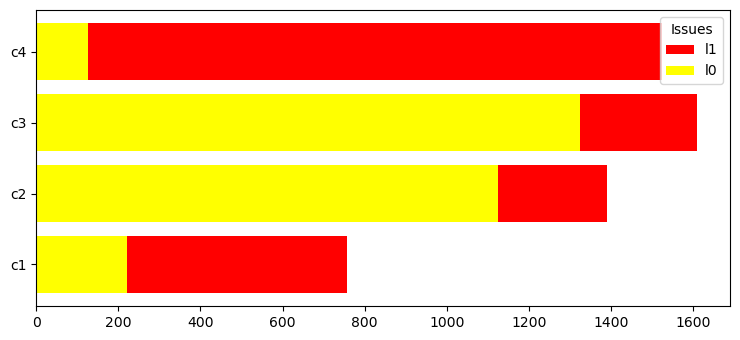

In [173]:
# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True

# year = [2014, 2015, 2016, 2017, 2018, 2019]
# issues_addressed = [10, 14, 0, 10, 15, 15]
# issues_pending = [5, 10, 50, 2, 0, 10]

client_idcs = get_part(p_id=9)

csv_file_train = "/Users/zhouyi/Desktop/Fair_FL_new/data/compas-binary/compas_encoded_all_new_encoded_binary.csv"
train_data = dataset.CompasBinaryDataset(csv_file_train)
labels=train_data.y

clients = ["c1", "c2", "c3", "c4"]
samples_l0 = []
samples_l1 = []
for c_id in client_idcs.keys():
    local_label = labels[client_idcs[c_id]]
    samples_l1.append(sum(local_label))
    samples_l0.append(len(local_label)-sum(local_label))
    
print(samples_l1)
print(samples_l0)


b2 = plt.barh(clients, samples_l0, color="yellow")
b1 = plt.barh(clients, samples_l1,left=samples_l0, color="red")

plt.legend([b1, b2], ["l1", "l0"], title="Issues", loc="upper right")

plt.show()

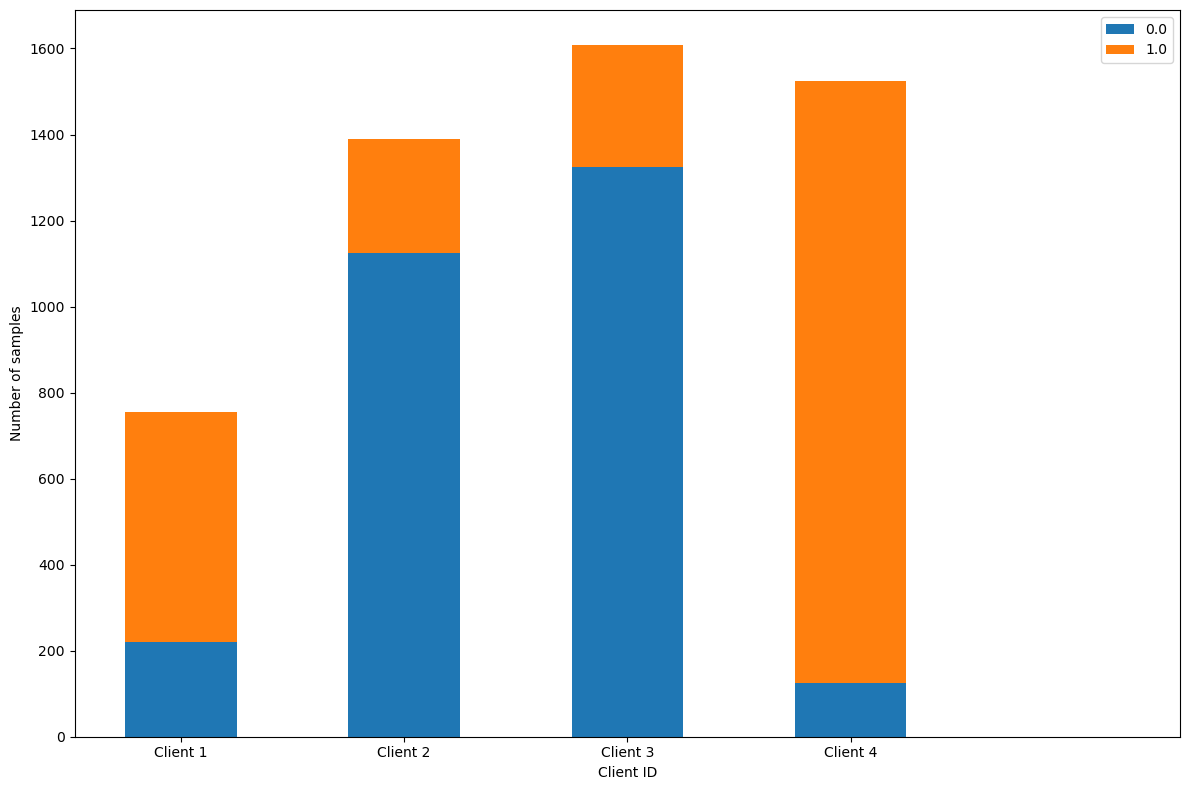

In [172]:
def get_part(p_id):
    path_root = "/Users/zhouyi/Desktop/Fair_FL_new/data/compas-binary/partition/{}/".format(p_id)
    file_ls = os.listdir(path_root)
    partition_file_ls = [file for file in file_ls if '.npy' in file]
    partition_file = path_root + '/' + partition_file_ls[0]


    client_idcs =  np.load(partition_file, allow_pickle=True).item()
    
    return client_idcs


    
client_idcs = get_part(p_id=9)    
n_clients = 4
n_classes=2

csv_file_train = "/Users/zhouyi/Desktop/Fair_FL_new/data/compas-binary/compas_encoded_all_new_encoded_binary.csv"
target_attr = "two_year_recid"
train_data = dataset.CompasBinaryDataset(csv_file_train)
labels = train_data.y
classes = list(set(labels))
n_classes = len(classes)

plt.figure(figsize=(12, 8))
label_distribution = [[] for _ in range(n_classes)]
for c_id in range(len(client_idcs)):
    idc = client_idcs[c_id]
    for idx in idc:
        label_distribution[int(labels[int(idx)])].append(c_id)

plt.hist(label_distribution, stacked=True,
            bins=np.arange(-0.5, n_clients + 1.5, 1),
            label=classes, rwidth=0.5)
plt.xticks(np.arange(n_clients), ["Client %d" %
                                    (c_id+1) for c_id in range(n_clients)])
plt.xlabel("Client ID")
plt.ylabel("Number of samples")
plt.legend()
plt.show()



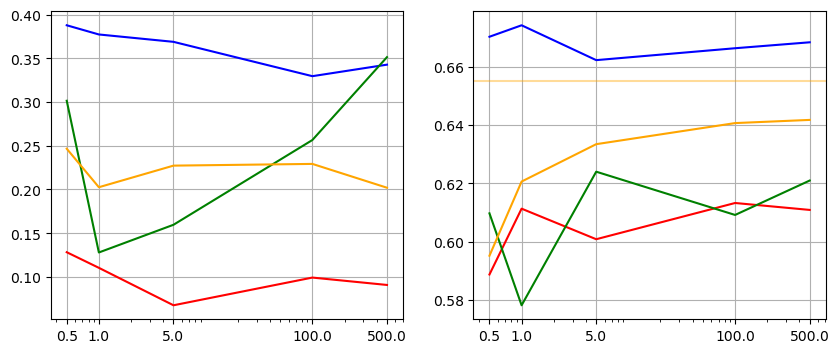

In [83]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
# X = list(range(1,len(stats_all["test_eod_new"][0])+1))
# X, y_eod, y_acc = collect_files(part_idx_ls, key_ls)
X = [0.5, 1, 5.0, 100, 500]

line_wid = 1.5
alpha = 0.2

# target_data_1 = stats_all["test_tpr_new"]
ax1.plot(X, y_eod_new, color='red', label='Our method', linewidth = line_wid)
ax1.plot(X, y_eod_fedavg, color='blue', label='Our method', linewidth = line_wid)
ax1.plot(X, y_eod_fairfed, color='green', label='Our method', linewidth = line_wid)
ax1.plot(X, y_eod_fairfed_rep, color='orange', label='Our method', linewidth = line_wid)

ax1.set_xscale('log')
ax1.grid()


ax2.plot(X, y_acc_new, color='red', label='Our method', linewidth = line_wid)
ax2.plot(X, y_acc_fedavg, color='blue', label='Our method', linewidth = line_wid)
ax2.plot(X, y_acc_fairfed, color='green', label='Our method', linewidth = line_wid)
ax2.plot(X, y_acc_fairfed_rep, color='orange', label='Our method', linewidth = line_wid)


ax2.set_xscale('log')
ax2.axhline(0.655, color='orange', alpha=0.4)
ax2.grid()

# ax1.fill_between(X, np.mean(target_data_1, axis=0) - np.std(target_data_1, axis=0),np.mean(target_data_1, axis=0) + np.std(target_data_1, axis=0), color='red', alpha=alpha)


# target_data_2 = stats_all["test_tpr_fedavg"]
# ax1.plot(X, np.mean(target_data_2, axis=0), color='blue', label='FedAvg', linewidth = line_wid)
# ax1.fill_between(X, np.mean(target_data_2, axis=0) - np.std(target_data_2, axis=0),np.mean(target_data_2, axis=0) + np.std(target_data_2, axis=0), color='navy', alpha=alpha)


#     title = data_path.split("/")[-2]
#     # ax1.set_title(title)
#     fig.suptitle(title, fontsize=12)
#     ax1.legend(loc='best')
#     # ax.set_ylim([0.88,1.02])
#     ax1.set_ylabel("TPR")
#     ax2.set_ylabel("FPR")
#     ax1.set_xlabel("Client #")
#     ax2.set_xlabel("Client #")
ax1.set_xticks(X)
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.set_xticks(X)
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#     ax2.set_xticks(np.arange(min(X), max(X)+1, 1.0))
plt.show()

In [ ]:
def collect_rounds(args, rounds=[2]):

    if args.platform=="kaggle":
        stat_dir = "/kaggle/working/statistics"
    elif args.platform=="colab":
        stat_dir = "/content/drive/MyDrive/Fair_FL_new/save/statistics"
    elif args.platform=="azure":
        stat_dir = os.getcwd() + '/save/statistics'
    else:
        stat_dir =  os.getcwd() + '/save/statistics'

    exp_dir = stat_dir + "/" + str(args.idx)


    stats_rounds = {}
    stats_rounds["test_eod_new"] = []
    stats_rounds["test_eod_fedavg"] = []
    stats_rounds["test_eod_fairfed"] = []
    stats_rounds["test_acc_new"] = []
    stats_rounds["test_acc_fedavg"] = []
    stats_rounds["test_acc_fairfed"] = []
    # dict.fromkeys(["test_eod_new", "test_acc_new", "test_eod_fedavg", "test_acc_fedavg", "test_acc_fairfed", "test_eod_fairfed"], [])

    for round_idx in rounds:
        target_exp = 'stats_{}_{}_frac{}_client{}_lr{}_ftlr{}_part{}_beta{}_ep{}_{}_{}_ftep_{}_bs{}_ftbs{}_fta_{}{}'.\
        format(args.dataset, args.model, args.frac, args.num_users,
               args.lr, args.ft_lr, args.partition_idx, args.beta, round_idx, args.local_ep, round_idx, args.ft_ep, args.local_bs, args.ft_bs, args.ft_alpha,args.ft_alpha2, )    # <------------- iid tobeadded
     
        # target_exp = 'stats_{}_{}_frac{}_client{}_lr{}_part{}_beta{}_ep{}_{}_{}_ftep_{}'.\
        #     format(args.dataset, args.model, args.frac, args.num_users,
        #         args.lr, args.partition_idx, args.beta, round_idx, args.local_ep, round_idx, args.ft_ep)    # <------------- iid tobeadded
        
        data_path = exp_dir + "/" + target_exp + "/stats_multi_exp.pkl"

        with open(data_path, 'rb') as inp:
            stats_all = pickle.load(inp)
            print("Round:", round_idx, " Loaded stats saved in: ", data_path)
        
        axis = 0
        print(stats_all["test_eod_new"])
        print(np.mean(stats_all["test_eod_new"], axis=axis))
       
        stats_rounds["test_eod_new"].append(np.mean(stats_all["test_eod_new"], axis=axis))
        stats_rounds["test_eod_fedavg"].append(np.mean(stats_all["test_eod_fedavg"], axis=axis))
        stats_rounds["test_eod_fairfed"].append(np.mean(stats_all["test_eod_fairfed"], axis=axis))
        stats_rounds["test_acc_new"].append(np.mean(stats_all["test_acc_new"], axis=axis))
        stats_rounds["test_acc_fedavg"].append(np.mean(stats_all["test_acc_fedavg"], axis=axis))
        stats_rounds["test_acc_fairfed"].append(np.mean(stats_all["test_acc_fairfed"], axis=axis))

    print(len(stats_rounds["test_eod_new"]))
    print((stats_rounds["test_eod_new"]))

    # Save all stats to object
    save_to_dir = "{}/round_{}".format(exp_dir, target_exp)
    os.makedirs(save_to_dir, exist_ok=True)
    save_to_file = save_to_dir+"/stats_round_exp.pkl"
    with open(save_to_file, 'wb') as outp:
        pickle.dump(stats_rounds, outp, pickle.HIGHEST_PROTOCOL)

    print("Successfully saved in: "+save_to_file )

    return save_to_file